After detailed research, we decided to fetch the data to be utilized within the scope of the model to be developed from the BoxScoreAdvancedV2 API. In order to validate the model, we planned to make transfer predictions for the past seasons as well. For this reason, we fetch 10 years of records from the 2015-16 season to 2024-25. Specified data consists of detailed player statistics for an individual game. The advanced attributes can be listed as follows:

* START_POSITION: The starting position of the player in the game (e.g., "G" for Guard, "C" for Center).
* MIN: Total minutes played by the player during the game.
* OFF_RATING (Offensive Rating): Points scored per 100 possessions by the team while the player was on the court.
* DEF_RATING (Defensive Rating): Points allowed per 100 possessions by the team while the player was on the court.
* AST_PCT (Assist Percentage): The percentage of teammate field goals that the player assisted while on the court.
* AST_TOV (Assist to Turnover Ratio): Ratio of assists to turnovers made by the player.
* AST_RATIO (Assist Ratio): Assists per 100 possessions used by the player.
* OREB_PCT (Offensive Rebound Percentage): Percentage of available offensive rebounds a player grabbed while on the court.
* DREB_PCT (Defensive Rebound Percentage): Percentage of available defensive rebounds a player grabbed while on the court.
* REB_PCT (Rebound Percentage): Percentage of total rebounds (offensive + defensive) a player grabbed while on the court.
* TM_TOV_PCT (Team Turnover Percentage): The percentage of team possessions ending in a turnover while the player was on the court.
* EFG_PCT (Effective Field Goal Percentage): A shooting percentage adjusted to account for the fact that three-point shots are worth more than two-point shots.
* TS_PCT (True Shooting Percentage): A shooting efficiency metric that accounts for field goals, three-pointers, and free throws.
* USG_PCT (Usage Percentage): The percentage of team plays used by the player while on the court (includes field goal attempts, free throw attempts, and turnovers).
* PACE: The number of possessions per 48 minutes by the player's team while they were on the court.
* PACE_PER40: Adjusted pace statistic per 40 minutes instead of 48.
* POSS: Total number of possessions the player was involved in during the game.
* PIE (Player Impact Estimate): A metric that estimates a player's overall statistical contribution to the game relative to the total statistics of the game.

In [15]:
from nba_api.stats.endpoints import LeagueGameFinder, boxscoreadvancedv2
import pandas as pd
import time

seasons = ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23", "2023-24", "2024-25"]
all_data = pd.DataFrame()

for season in seasons:
    game_finder = LeagueGameFinder(season_nullable=season, league_id_nullable="00")
    games = game_finder.get_data_frames()[0]
    
    games = games[['GAME_ID', 'GAME_DATE']]
    
    game_ids = games['GAME_ID'].unique()
    print(f"{season}: {len(game_ids)} games")
    
    i = 1
    for game_id in game_ids:
        print(f"Processing game {i} of {len(game_ids)} for season {season}")
        try:
            boxscore = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id)
            player_stats = boxscore.player_stats.get_data_frame()
            
            player_stats = player_stats.merge(games, on='GAME_ID', how='left')
            
            columns = ['GAME_ID', 'GAME_DATE'] + [col for col in player_stats.columns if col not in ['GAME_ID', 'GAME_DATE']]
            player_stats = player_stats[columns]
            
            all_data = pd.concat([all_data, player_stats], ignore_index=True)
            time.sleep(0.6)
            
        except Exception as e:
            print(f"Error fetching data for game {game_id} in season {season}: {e}")
            continue
        i += 1

all_data.to_csv("PlayerStats_2015-2025.csv", index=False)
print("Data retrieval complete!")

2015-16: 1428 games
Processing game 1 of 1428 for season 2015-16
Processing game 2 of 1428 for season 2015-16
Processing game 3 of 1428 for season 2015-16
Processing game 4 of 1428 for season 2015-16
Processing game 5 of 1428 for season 2015-16
Processing game 6 of 1428 for season 2015-16
Processing game 7 of 1428 for season 2015-16
Processing game 8 of 1428 for season 2015-16
Processing game 9 of 1428 for season 2015-16
Processing game 10 of 1428 for season 2015-16
Processing game 11 of 1428 for season 2015-16
Processing game 12 of 1428 for season 2015-16
Processing game 13 of 1428 for season 2015-16
Processing game 14 of 1428 for season 2015-16
Processing game 15 of 1428 for season 2015-16
Processing game 16 of 1428 for season 2015-16
Processing game 17 of 1428 for season 2015-16
Processing game 18 of 1428 for season 2015-16
Processing game 19 of 1428 for season 2015-16
Processing game 20 of 1428 for season 2015-16
Processing game 21 of 1428 for season 2015-16
Processing game 22 of 1

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_84429/2670114207.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, player_stats], ignore_index=True)


Processing game 518 of 1428 for season 2015-16
Processing game 519 of 1428 for season 2015-16
Processing game 520 of 1428 for season 2015-16
Processing game 521 of 1428 for season 2015-16
Processing game 522 of 1428 for season 2015-16
Processing game 523 of 1428 for season 2015-16
Processing game 524 of 1428 for season 2015-16
Processing game 525 of 1428 for season 2015-16
Processing game 526 of 1428 for season 2015-16
Processing game 527 of 1428 for season 2015-16
Processing game 528 of 1428 for season 2015-16
Processing game 529 of 1428 for season 2015-16
Processing game 530 of 1428 for season 2015-16
Processing game 531 of 1428 for season 2015-16
Processing game 532 of 1428 for season 2015-16
Processing game 533 of 1428 for season 2015-16
Processing game 534 of 1428 for season 2015-16
Processing game 535 of 1428 for season 2015-16
Processing game 536 of 1428 for season 2015-16
Processing game 537 of 1428 for season 2015-16
Processing game 538 of 1428 for season 2015-16
Processing ga

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_84429/2670114207.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, player_stats], ignore_index=True)


Processing game 463 of 1414 for season 2016-17
Processing game 464 of 1414 for season 2016-17
Processing game 465 of 1414 for season 2016-17
Processing game 466 of 1414 for season 2016-17
Processing game 467 of 1414 for season 2016-17
Processing game 468 of 1414 for season 2016-17
Processing game 469 of 1414 for season 2016-17
Processing game 470 of 1414 for season 2016-17
Processing game 471 of 1414 for season 2016-17
Processing game 472 of 1414 for season 2016-17
Processing game 473 of 1414 for season 2016-17
Processing game 474 of 1414 for season 2016-17
Processing game 475 of 1414 for season 2016-17
Processing game 476 of 1414 for season 2016-17
Processing game 477 of 1414 for season 2016-17
Processing game 478 of 1414 for season 2016-17
Processing game 479 of 1414 for season 2016-17
Processing game 480 of 1414 for season 2016-17
Processing game 481 of 1414 for season 2016-17
Processing game 482 of 1414 for season 2016-17
Processing game 483 of 1414 for season 2016-17
Processing ga

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_84429/2670114207.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, player_stats], ignore_index=True)


Processing game 361 of 1258 for season 2019-20
Processing game 362 of 1258 for season 2019-20
Processing game 363 of 1258 for season 2019-20
Processing game 364 of 1258 for season 2019-20
Processing game 365 of 1258 for season 2019-20
Processing game 366 of 1258 for season 2019-20
Processing game 367 of 1258 for season 2019-20
Processing game 368 of 1258 for season 2019-20
Processing game 369 of 1258 for season 2019-20
Processing game 370 of 1258 for season 2019-20
Processing game 371 of 1258 for season 2019-20
Processing game 372 of 1258 for season 2019-20
Processing game 373 of 1258 for season 2019-20
Processing game 374 of 1258 for season 2019-20
Processing game 375 of 1258 for season 2019-20
Processing game 376 of 1258 for season 2019-20
Processing game 377 of 1258 for season 2019-20
Processing game 378 of 1258 for season 2019-20
Processing game 379 of 1258 for season 2019-20
Processing game 380 of 1258 for season 2019-20
Processing game 381 of 1258 for season 2019-20
Processing ga

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_84429/2670114207.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, player_stats], ignore_index=True)


Processing game 443 of 1394 for season 2021-22
Processing game 444 of 1394 for season 2021-22
Processing game 445 of 1394 for season 2021-22
Processing game 446 of 1394 for season 2021-22
Processing game 447 of 1394 for season 2021-22
Processing game 448 of 1394 for season 2021-22
Processing game 449 of 1394 for season 2021-22
Processing game 450 of 1394 for season 2021-22
Processing game 451 of 1394 for season 2021-22
Processing game 452 of 1394 for season 2021-22
Processing game 453 of 1394 for season 2021-22
Processing game 454 of 1394 for season 2021-22
Processing game 455 of 1394 for season 2021-22
Processing game 456 of 1394 for season 2021-22
Processing game 457 of 1394 for season 2021-22
Processing game 458 of 1394 for season 2021-22
Processing game 459 of 1394 for season 2021-22
Processing game 460 of 1394 for season 2021-22
Processing game 461 of 1394 for season 2021-22
Processing game 462 of 1394 for season 2021-22
Processing game 463 of 1394 for season 2021-22
Processing ga

After the return from the API, we push the data directly to a csv file.

In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
df = pd.read_csv("PlayerStats_2015-2025.csv")
df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,11.4,0.396,0.475,0.330,0.329,93.33,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,11.4,0.396,0.475,0.330,0.329,93.33,89.71,74.75,87,0.190
2,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,NaN,...,6.7,0.333,0.418,0.179,0.178,92.51,87.10,72.59,55,0.180
3,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,NaN,...,6.7,0.333,0.418,0.179,0.178,92.51,87.10,72.59,55,0.180
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,C,NaN,...,0.0,1.000,0.945,0.074,0.075,93.92,92.05,76.71,61,0.073


In [2]:
df.drop(
    columns=[
        "COMMENT",
        "E_OFF_RATING",
        "E_DEF_RATING",
        "E_NET_RATING",
        "E_USG_PCT",
        "NET_RATING",
        "E_PACE"
    ],
    inplace=True,
)

In [3]:
df.dropna(subset=["MIN"], inplace=True)

In [4]:
def get_sec(time_str):
    minute, s = time_str.split(":")
    m = minute.split(".")
    return int(m[0]) * 60 + int(s)

In [5]:
df.loc[:, "MIN"] = df.loc[:, "MIN"].map(lambda x: get_sec(x))

In [6]:
df

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
2,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
3,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,F,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,C,1909,...,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661528,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642422,Armel Traore,Armel,NaN,250,...,0.000,0.111,0.0,1.000,1.025,0.182,109.44,91.20,10,0.243
661529,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,NaN,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037
661530,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,NaN,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037
661531,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642439,Quincy Olivari,Quincy,NaN,185,...,0.667,0.333,50.0,0.000,1.136,0.250,108.97,90.81,7,0.381


In [7]:
df.START_POSITION.value_counts(dropna=False)

START_POSITION
NaN    291502
F      100192
G      100192
C       50098
Name: count, dtype: int64

In [8]:
import numpy as np
mapping = {
    np.nan: 0,
    "G": 1,
    "F": 2, 
    "C": 3
    }
    
df.loc[:, "START_POSITION"] = df.START_POSITION.map(mapping)
df.loc[:, "START_POSITION"] = df.loc[:, "START_POSITION"].astype(int)

In [9]:
df.isnull().sum()

GAME_ID              0
GAME_DATE            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
START_POSITION       0
MIN                  0
OFF_RATING           0
DEF_RATING           0
AST_PCT              0
AST_TOV              0
AST_RATIO            0
OREB_PCT             0
DREB_PCT             0
REB_PCT              0
TM_TOV_PCT           0
EFG_PCT              0
TS_PCT               0
USG_PCT              0
PACE                 0
PACE_PER40           0
POSS                 0
PIE                  0
dtype: int64

In [10]:
df.duplicated().sum()

271020

In [11]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.columns

Index(['GAME_ID', 'GAME_DATE', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'MIN',
       'OFF_RATING', 'DEF_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')

In [13]:
df

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.093,0.047,11.8,0.462,0.462,0.176,90.66,75.55,73,0.043
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.064,0.065,7.4,0.478,0.525,0.277,89.30,74.42,80,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270959,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642355,Bronny James,Bronny,0,964,...,0.053,0.029,12.5,0.167,0.167,0.200,100.08,83.40,33,-0.007
270960,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630658,Colin Castleton,Colin,0,711,...,0.067,0.083,20.0,0.000,0.568,0.094,121.52,101.27,30,0.022
270961,12400003,2024-10-04,1610612747,LAL,Los Angeles,1642422,Armel Traore,Armel,0,250,...,0.000,0.111,0.0,1.000,1.025,0.182,109.44,91.20,10,0.243
270962,12400003,2024-10-04,1610612747,LAL,Los Angeles,1630283,Kylor Kelley,Kylor,0,354,...,0.000,0.000,20.0,0.667,0.667,0.364,89.49,74.58,11,0.037


In [14]:
features = [
    col
    for col in df.columns
    if col
    not in (
        "GAME_ID",
        "TEAM_ID",
        "TEAM_ABBREVIATION",
        "TEAM_CITY",
        "PLAYER_ID",
        "PLAYER_NAME",
        "NICKNAME",
        "GAME_DATE"
    )
]

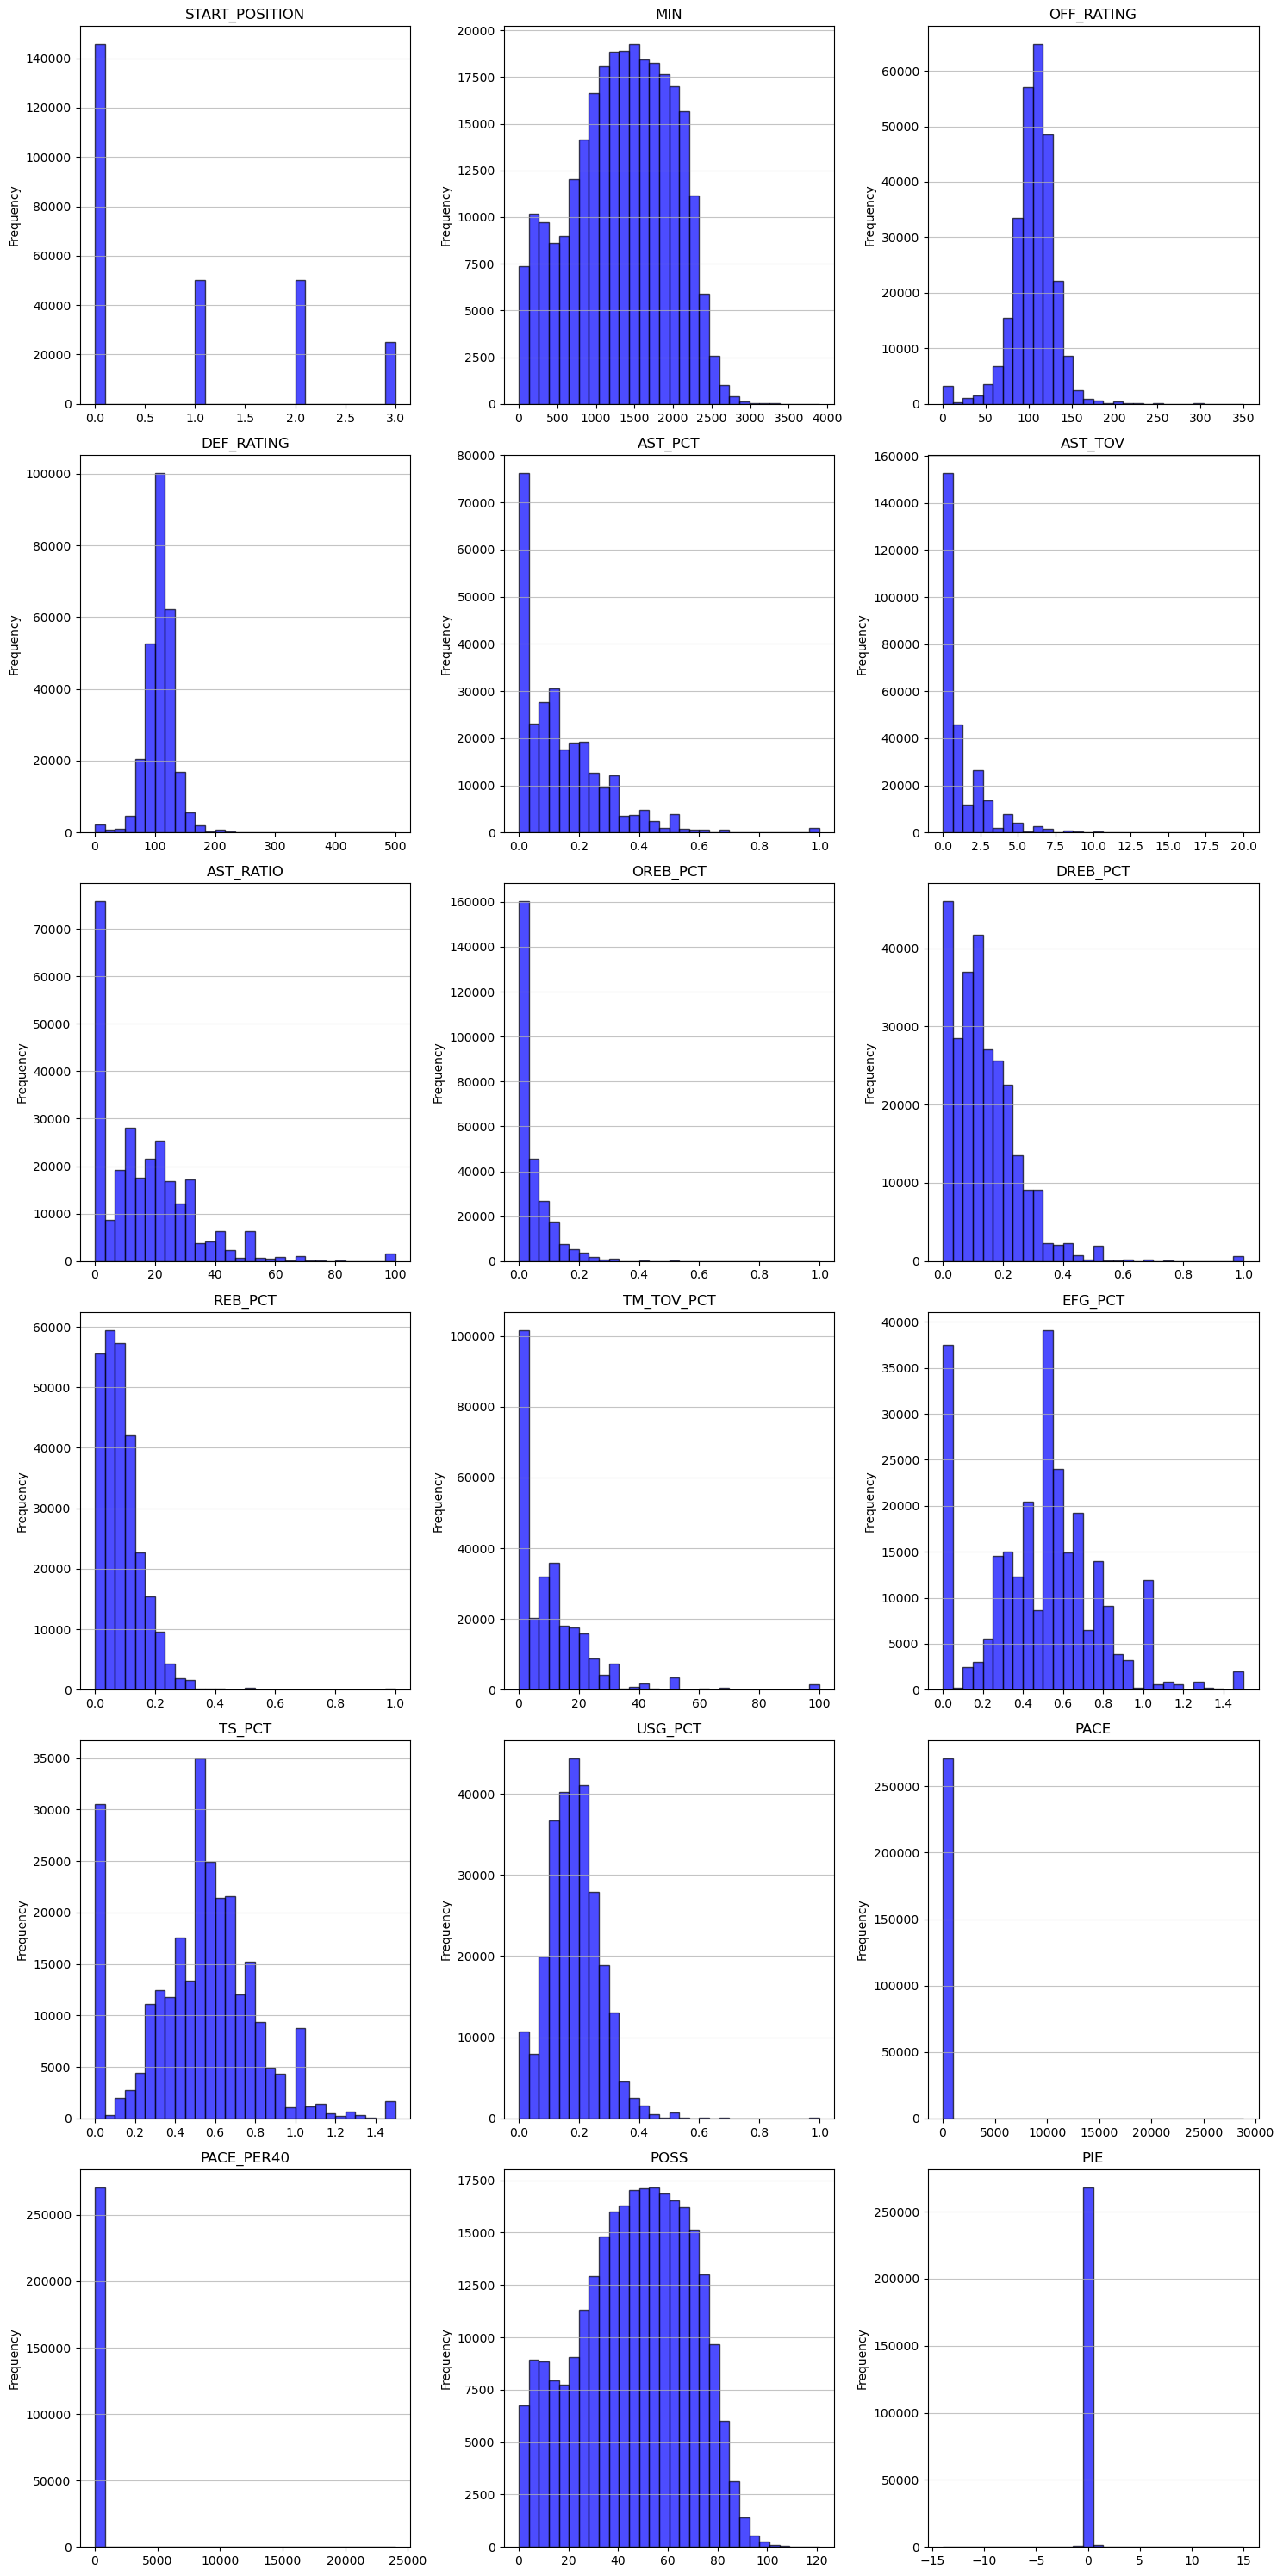

In [15]:
import matplotlib.pyplot as plt
import math

num_features = len(features)
num_cols = 3 
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Looking at the plots, we can say most of the variables are right skewed while MIN, OFF_RATING and POSS introduce a slightly more normal distribution. 

In [16]:
df[features].describe()

,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
count,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.00000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000,270964.000000
mean,105.572386,107.968846,0.138960,1.019675,16.246016,0.041238,0.135281,0.088425,10.23082,0.487696,0.520194,0.183698,102.784491,85.653714,46.574918,0.088382
std,24.747420,24.554691,0.144605,1.582894,15.778483,0.063211,0.112341,0.070405,12.79162,0.290735,0.279419,0.086516,95.225405,79.354499,21.962739,0.175380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,94.100000,95.700000,0.000000,0.000000,0.000000,0.000000,0.059000,0.041000,0.00000,0.333000,0.372000,0.128000,96.000000,80.000000,31.000000,0.035000
50%,107.300000,108.200000,0.107000,0.330000,14.300000,0.000000,0.118000,0.077000,7.70000,0.500000,0.533000,0.179000,100.430000,83.690000,48.000000,0.089000
75%,120.000000,120.800000,0.211000,1.500000,25.000000,0.063000,0.190000,0.123000,15.40000,0.667000,0.688000,0.236000,105.220000,87.680000,64.000000,0.143000
max,350.000000,500.000000,1.000000,20.000000,100.000000,1.000000,1.000000,1.000000,100.00000,1.500000,1.500000,1.000000,28811.520000,24009.600000,121.000000,15.000000


In [17]:
num_fts = features.copy()
num_fts.remove('START_POSITION')

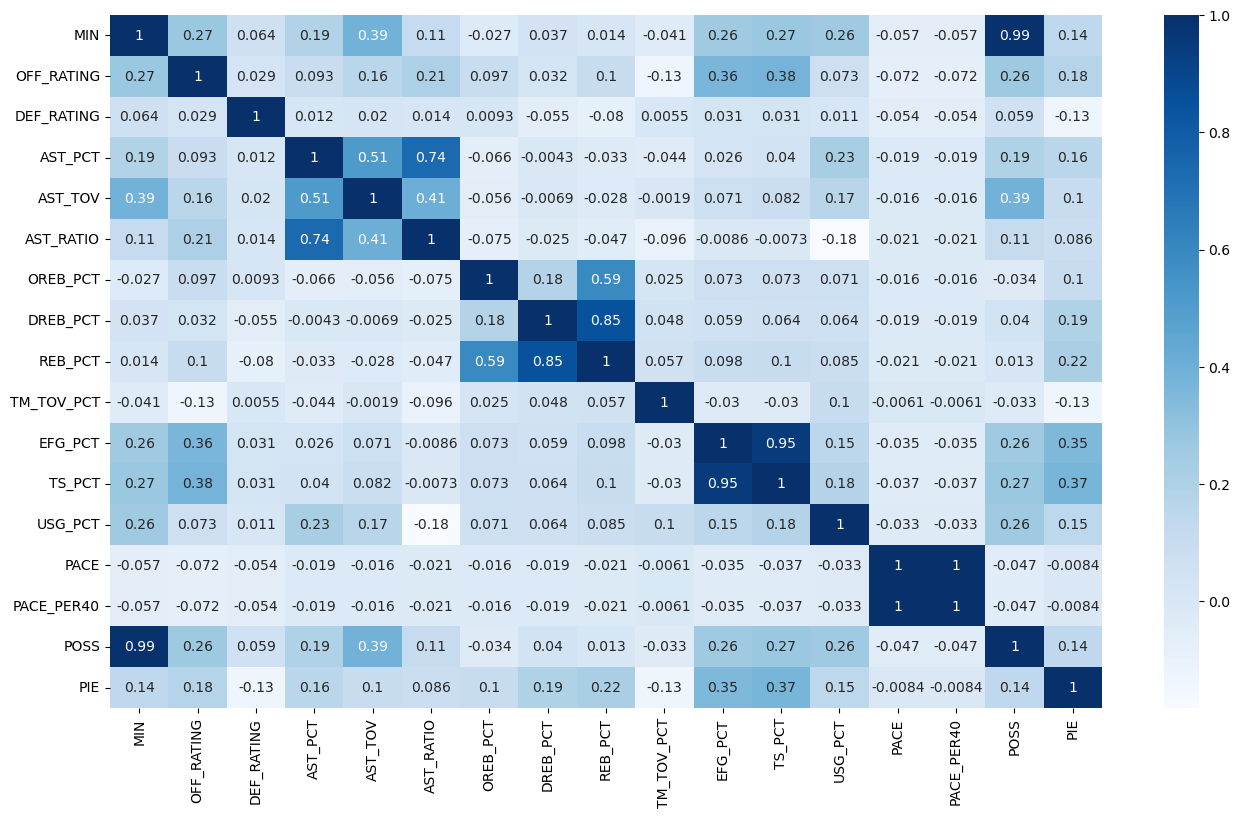

In [18]:
corrs = df[num_fts].corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corrs, cmap='Blues', annot=True)
plt.show()

## Grouping

In [19]:
# shooting guard
sg_group_1 = ['OFF_RATING', 'AST_PCT', 'AST_TOV', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'POSS']
sg_group_2 = ['MIN', 'AST_RATIO', 'DREB_PCT']
sg_group_3 = ['OREB_PCT', 'REB_PCT', 'USG_PCT', 'PACE', 'PACE_PER40', 'PIE']
sg_group_4 = ['START_POSITION']
sg_group_5 = ['DEF_RATING']

# point guard
pg_group_1 = ['OFF_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'EFG_PCT', 'TS_PCT', 'POSS']
pg_group_2 = ['MIN', 'USG_PCT', 'DREB_PCT']
pg_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
pg_group_4 = ['START_POSITION']
pg_group_5 = ['DEF_RATING']

# small forward
sf_group_1 = ['OFF_RATING', 'AST_PCT', 'EFG_PCT', 'TS_PCT', 'POSS']
sf_group_2 = ['MIN', 'AST_RATIO', 'USG_PCT']
sf_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
sf_group_4 = ['START_POSITION']
sf_group_5 = ['DEF_RATING']

# power forward
pf_group_1 = ['OFF_RATING', 'EFG_PCT', 'TS_PCT', 'POSS', 'USG_PCT']
pf_group_2 = ['MIN', 'AST_RATIO', 'DREB_PCT']
pf_group_3 = ['OREB_PCT', 'REB_PCT', 'PIE']
pf_group_4 = ['START_POSITION']
pf_group_5 = ['DEF_RATING']

# center
c_group_1 = ['DEF_RATING', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'POSS']
c_group_2 = ['MIN', 'USG_PCT', 'DREB_PCT']
c_group_3 = ['OFF_RATING', 'EFG_PCT', 'TS_PCT', 'PIE']
c_group_4 = ['START_POSITION']
c_group_5 = ['AST_PCT']

In [20]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

df_2015_2021 = df[(df['GAME_DATE'].dt.year >= 2015) & (df['GAME_DATE'].dt.year <= 2021)]

df_2022_2024 = df[(df['GAME_DATE'].dt.year >= 2022) & (df['GAME_DATE'].dt.year <= 2024)]

print(f"2015-2021: {df_2015_2021.shape}, 2022-2024: {df_2022_2024.shape}")

2015-2021: (187805, 26), 2022-2024: (83159, 26)


In [21]:
df_2015_2021.to_csv('nba_data_2015_2021.csv', index=False)
df_2022_2024.to_csv('nba_data_2022_2024.csv', index=False)

## PCA

In [22]:
data_2015_2021 = df_2015_2021[features].copy()

In [23]:
data_scaled = data_2015_2021.copy()
data_scaled.head()

,START_POSITION,MIN,OFF_RATING,DEF_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PACE_PER40,POSS,PIE
0,2,2809,103.4,97.7,0.458,2.2,25.0,0.020,0.192,0.109,11.4,0.396,0.475,0.330,89.71,74.75,87,0.190
1,2,1802,120.0,87.0,0.150,3.0,20.0,0.129,0.294,0.215,6.7,0.333,0.418,0.179,87.10,72.59,55,0.180
2,3,1909,100.0,96.7,0.000,0.0,0.0,0.000,0.083,0.043,0.0,1.000,0.945,0.074,92.05,76.71,61,0.073
3,1,2335,113.7,102.7,0.087,1.0,11.8,0.000,0.093,0.047,11.8,0.462,0.462,0.176,90.66,75.55,73,0.043
4,1,2580,108.8,96.3,0.050,0.5,3.7,0.065,0.064,0.065,7.4,0.478,0.525,0.277,89.30,74.42,80,0.109


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)

In [25]:
data_scaled

array([[0.66666667, 0.72062596, 0.29542857, ..., 0.00622668, 0.71900826,
        0.61695652],
       [0.66666667, 0.46228835, 0.34285714, ..., 0.00604675, 0.45454545,
        0.61652174],
       [1.        , 0.48973833, 0.28571429, ..., 0.00638994, 0.50413223,
        0.61186957],
       ...,
       [0.        , 0.19061057, 0.20114286, ..., 0.00739871, 0.2231405 ,
        0.60869565],
       [0.        , 0.14930734, 0.22857143, ..., 0.00686975, 0.16528926,
        0.60804348],
       [0.        , 0.11159569, 0.26657143, ..., 0.00689391, 0.12396694,
        0.61695652]])

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)
pca.explained_variance_ratio_

array([4.18330605e-01, 1.93054526e-01, 1.30927388e-01, 8.37427377e-02,
       4.89088398e-02, 4.35878316e-02, 2.71162327e-02, 1.29252775e-02,
       1.05580295e-02, 1.01365059e-02, 6.73608292e-03, 6.57815029e-03,
       5.49537823e-03, 9.13668973e-04, 6.76145187e-04, 1.93478540e-04,
       1.19122917e-04, 1.41122226e-13])

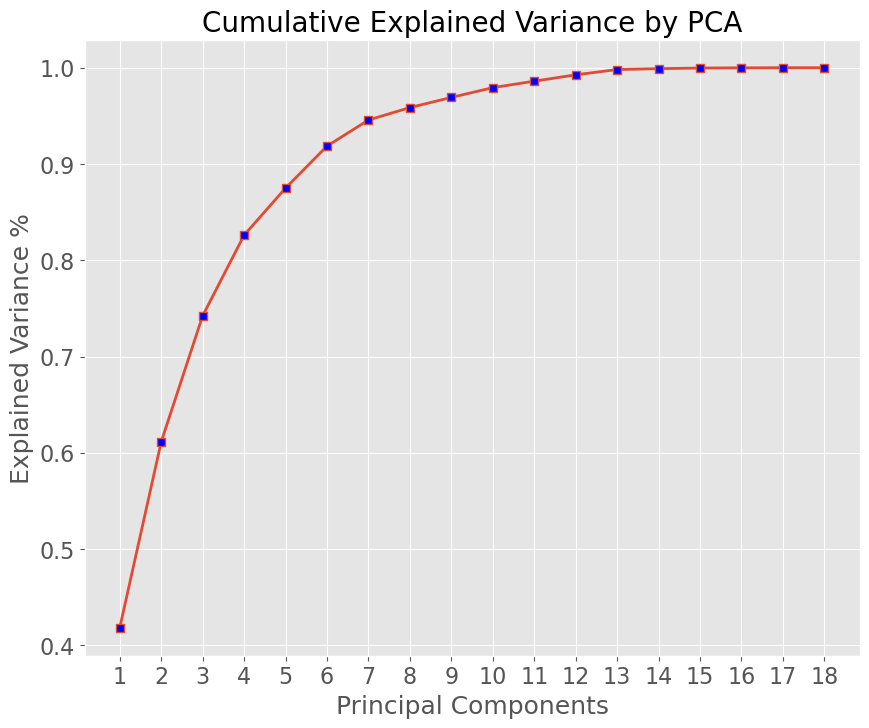

In [27]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(10, 8))
    plt.plot(range(1, 19), pca.explained_variance_ratio_.cumsum(), 
             markerfacecolor='blue', marker='s', linestyle='-', linewidth=2)
    plt.xlabel('Principal Components', fontsize=18)
    plt.ylabel('Explained Variance %', fontsize=18)
    plt.xticks(ticks=range(1, 19), fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('Cumulative Explained Variance by PCA', fontsize=20)
    plt.show()


In [28]:
pca = PCA(n_components = 4)
pca.fit(data_scaled)
pca_scores = pca.transform(data_scaled)

## K-Means

In [29]:
km_df = df_2015_2021.copy()

In [30]:
from sklearn.cluster import KMeans
wcss = list()

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=1)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)

In [31]:
wcss

[54215.61804231871,
 32261.542777814495,
 25262.138444226934,
 20445.824390534486,
 18178.128989783305,
 16115.903340616407,
 14671.356935084828,
 13599.132021093168,
 12662.579428719791,
 11881.957945923648]

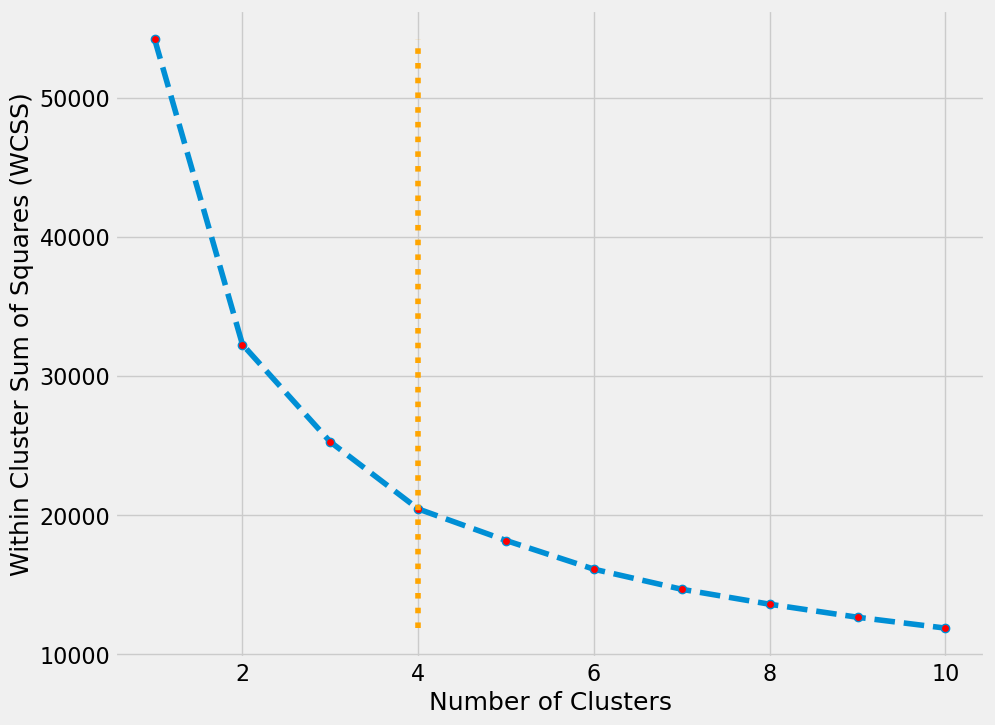

Optimal number of clusters: 4


In [32]:
from kneed import KneeLocator

with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(10, 8))
    plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='red', linestyle='--')
    plt.vlines(KneeLocator([i for i in range(1, 11)], wcss, curve='convex', direction='decreasing').knee, ymin=min(
        wcss), ymax=max(wcss), linestyles='dotted', color='orange')
    plt.xlabel('Number of Clusters', fontsize=18)
    plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

n_clusters = KneeLocator([i for i in range(1, 11)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", n_clusters)

In [33]:
kmeans_pca = KMeans(n_clusters=4, init='random', random_state=1)
kmeans_pca.fit_predict(pca_scores)
km_df['km_cluster'] = kmeans_pca.labels_

In [34]:
pca_km_df = pd.concat([km_df.reset_index(drop=True), pd.DataFrame(
    data=pca_scores, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])], axis=1)

In [35]:
pca_km_df.head()

,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,USG_PCT,PACE,PACE_PER40,POSS,PIE,km_cluster,pca_1,pca_2,pca_3,pca_4
0,41500407,2016-06-19,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,2,2809,...,0.330,89.71,74.75,87,0.190,1,0.572885,-0.080019,0.390113,0.114654
1,41500407,2016-06-19,1610612739,CLE,Cleveland,201567,Kevin Love,Kevin,2,1802,...,0.179,87.10,72.59,55,0.180,1,0.385601,-0.214780,0.036019,-0.063064
2,41500407,2016-06-19,1610612739,CLE,Cleveland,202684,Tristan Thompson,Tristan,3,1909,...,0.074,92.05,76.71,61,0.073,1,0.784950,0.161279,-0.342901,-0.064941
3,41500407,2016-06-19,1610612739,CLE,Cleveland,2747,JR Smith,JR,1,2335,...,0.176,90.66,75.55,73,0.043,3,0.188411,-0.000870,0.095659,0.276210
4,41500407,2016-06-19,1610612739,CLE,Cleveland,202681,Kyrie Irving,Kyrie,1,2580,...,0.277,89.30,74.42,80,0.109,3,0.237746,0.044494,0.051963,0.384982


In [36]:
pca_km_df.km_cluster.value_counts()

km_cluster
2    55651
1    51770
3    42038
0    38346
Name: count, dtype: int64

In [37]:
pca_km_df.groupby(['km_cluster'])[sg_group_1].agg(np.mean)

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_32966/2742242031.py:1: FutureWarning: The provided callable <function mean at 0x106f7d940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pca_km_df.groupby(['km_cluster'])[sg_group_1].agg(np.mean)


,OFF_RATING,AST_PCT,AST_TOV,TM_TOV_PCT,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,,,
0,88.587827,0.107556,0.357738,11.578227,0.108637,0.151690,23.269233
1,107.955536,0.116050,1.052288,10.408884,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.533526,10.208237,0.681038,0.704751,36.371170
3,108.502866,0.227848,2.110800,9.663895,0.495281,0.533972,64.663685


In [38]:
pca_km_df.groupby(['km_cluster'])[pg_group_1].agg(np.mean)

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_32966/360487010.py:1: FutureWarning: The provided callable <function mean at 0x106f7d940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pca_km_df.groupby(['km_cluster'])[pg_group_1].agg(np.mean)


,OFF_RATING,AST_PCT,AST_TOV,AST_RATIO,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,,,
0,88.587827,0.107556,0.357738,15.035271,0.108637,0.151690,23.269233
1,107.955536,0.116050,1.052288,14.037452,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.533526,13.264692,0.681038,0.704751,36.371170
3,108.502866,0.227848,2.110800,22.352153,0.495281,0.533972,64.663685


In [39]:
pca_km_df.groupby(['km_cluster'])[sf_group_1].agg(np.mean)

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_32966/895415648.py:1: FutureWarning: The provided callable <function mean at 0x106f7d940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pca_km_df.groupby(['km_cluster'])[sf_group_1].agg(np.mean)


,OFF_RATING,AST_PCT,EFG_PCT,TS_PCT,POSS
km_cluster,,,,,
0,88.587827,0.107556,0.108637,0.151690,23.269233
1,107.955536,0.116050,0.532793,0.564298,59.838961
2,108.280180,0.109196,0.681038,0.704751,36.371170
3,108.502866,0.227848,0.495281,0.533972,64.663685


In [40]:
pca_km_df.groupby(['km_cluster'])[pf_group_1].agg(np.mean)

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_32966/3442652358.py:1: FutureWarning: The provided callable <function mean at 0x106f7d940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pca_km_df.groupby(['km_cluster'])[pf_group_1].agg(np.mean)


,OFF_RATING,EFG_PCT,TS_PCT,POSS,USG_PCT
km_cluster,,,,,
0,88.587827,0.108637,0.151690,23.269233,0.142489
1,107.955536,0.532793,0.564298,59.838961,0.192407
2,108.280180,0.681038,0.704751,36.371170,0.183326
3,108.502866,0.495281,0.533972,64.663685,0.215013


In [41]:
pca_km_df.groupby(['km_cluster'])[c_group_1].agg(np.mean)

/var/folders/y6/hf3bbmc56px372z_99r0spf40000gn/T/ipykernel_32966/969959847.py:1: FutureWarning: The provided callable <function mean at 0x106f7d940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pca_km_df.groupby(['km_cluster'])[c_group_1].agg(np.mean)


,DEF_RATING,OREB_PCT,DREB_PCT,REB_PCT,POSS
km_cluster,,,,,
0,104.826522,0.032348,0.120644,0.075594,23.269233
1,108.097292,0.055398,0.171432,0.113552,59.838961
2,105.772973,0.045988,0.136678,0.092215,36.371170
3,107.650595,0.022480,0.106086,0.064280,64.663685


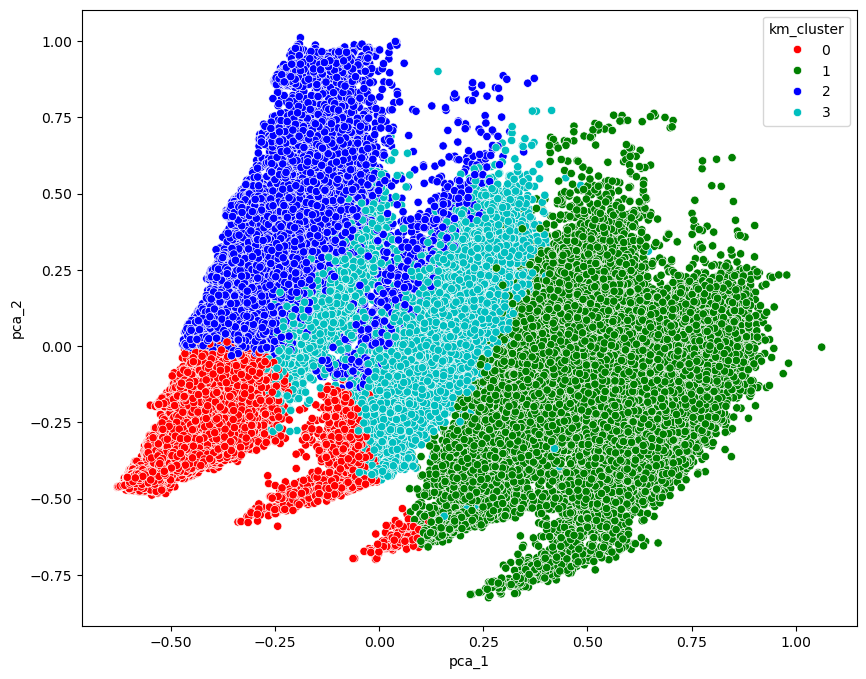

In [49]:
x_axis = pca_km_df['pca_1']
y_axis = pca_km_df['pca_2']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=pca_km_df['km_cluster'], palette=['r', 'g', 'b', 'c'])
plt.show()
